In [2]:
import numpy as np
import xarray as xr
#import xesmf as xe

#from functions.grid import get_bounds_rectilinear

datadir = "../data/"

In [3]:
ds = xr.open_dataset(datadir + "originaldata/" + "cnes_cls/" + "mdt_cnes_cls22_global.nc")
ds

<xarray.Dataset> Size: 199MB
Dimensions:    (time: 1, latitude: 1440, longitude: 2880, nv: 2)
Coordinates:
  * longitude  (longitude) float32 12kB -179.9 -179.8 -179.7 ... 179.8 179.9
  * latitude   (latitude) float32 6kB -89.94 -89.81 -89.69 ... 89.69 89.81 89.94
  * time       (time) datetime64[ns] 8B 2003-01-01
  * nv         (nv) int32 8B 0 1
Data variables:
    mdt        (time, latitude, longitude) float64 33MB ...
    u          (time, latitude, longitude) float64 33MB ...
    v          (time, latitude, longitude) float64 33MB ...
    err_mdt    (time, latitude, longitude) float64 33MB ...
    err_u      (time, latitude, longitude) float64 33MB ...
    err_v      (time, latitude, longitude) float64 33MB ...
    lat_bnds   (latitude, nv) float32 12kB ...
    lon_bnds   (longitude, nv) float32 23kB ...
    crs        int32 4B ...
Attributes: (12/32)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    cdm_data_type:              Grid
    history:                    2023-02-27T08:55:06Z : Creation
    contact:                    aviso@altimetry.fr, sjousset@groupcls.com
    creator_email:              sjousset@groupcls.com
    ...                         ...
    title:                      MDT_CNES_CLS22
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    time_coverage_duration:     P20Y
    time_coverage_start:        1993-01-01T00:00:00Z
    time_coverage_resolution:   P20Y
    time_coverage_end:          2013-01-01T00:00:00Z

In [4]:
ds = ds.rename({"longitude" : "lon", "latitude" : "lat"}).isel(time=0).drop_vars("time")
ds

<xarray.Dataset> Size: 199MB
Dimensions:   (lat: 1440, lon: 2880, nv: 2)
Coordinates:
  * lon       (lon) float32 12kB -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * lat       (lat) float32 6kB -89.94 -89.81 -89.69 ... 89.69 89.81 89.94
  * nv        (nv) int32 8B 0 1
Data variables:
    mdt       (lat, lon) float64 33MB ...
    u         (lat, lon) float64 33MB ...
    v         (lat, lon) float64 33MB ...
    err_mdt   (lat, lon) float64 33MB ...
    err_u     (lat, lon) float64 33MB ...
    err_v     (lat, lon) float64 33MB ...
    lat_bnds  (lat, nv) float32 12kB ...
    lon_bnds  (lon, nv) float32 23kB ...
    crs       int32 4B ...
Attributes: (12/32)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    cdm_data_type:              Grid
    history:                    2023-02-27T08:55:06Z : Creation
    contact:                    aviso@altimetry.fr, sjousset@groupcls.com
    creator_email:              sjousset@groupcls.com
    ...                         ...
    title:                      MDT_CNES_CLS22
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    time_coverage_duration:     P20Y
    time_coverage_start:        1993-01-01T00:00:00Z
    time_coverage_resolution:   P20Y
    time_coverage_end:          2013-01-01T00:00:00Z

In [5]:
ds = ds.sel(lat=slice(60, 90))
ds

<xarray.Dataset> Size: 33MB
Dimensions:   (lat: 240, lon: 2880, nv: 2)
Coordinates:
  * lon       (lon) float32 12kB -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
  * lat       (lat) float32 960B 60.06 60.19 60.31 60.44 ... 89.69 89.81 89.94
  * nv        (nv) int32 8B 0 1
Data variables:
    mdt       (lat, lon) float64 6MB ...
    u         (lat, lon) float64 6MB ...
    v         (lat, lon) float64 6MB ...
    err_mdt   (lat, lon) float64 6MB ...
    err_u     (lat, lon) float64 6MB ...
    err_v     (lat, lon) float64 6MB ...
    lat_bnds  (lat, nv) float32 2kB ...
    lon_bnds  (lon, nv) float32 23kB ...
    crs       int32 4B ...
Attributes: (12/32)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    cdm_data_type:              Grid
    history:                    2023-02-27T08:55:06Z : Creation
    contact:                    aviso@altimetry.fr, sjousset@groupcls.com
    creator_email:              sjousset@groupcls.com
    ...                         ...
    title:                      MDT_CNES_CLS22
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    time_coverage_duration:     P20Y
    time_coverage_start:        1993-01-01T00:00:00Z
    time_coverage_resolution:   P20Y
    time_coverage_end:          2013-01-01T00:00:00Z

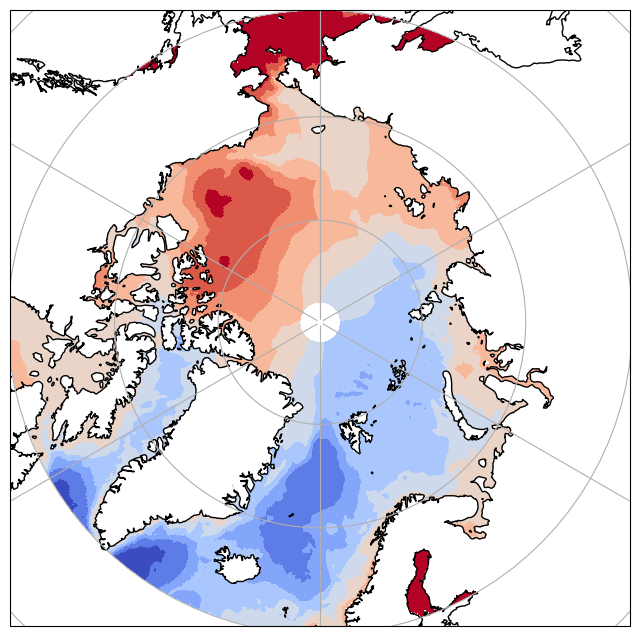

In [50]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(1, 1,
                       figsize=(10, 8),
                       subplot_kw={"projection" : ccrs.NorthPolarStereo()}
                      )
ax.coastlines()
ax.gridlines()
#ax.add_feature(cfeature.LAND, color="grey", zorder=100)
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())


cmap = plt.get_cmap('coolwarm', 10)

c = ax.pcolormesh(ds.lon, ds.lat, ds.mdt.isel(lon=slice(0, -1), lat=slice(0, -1)), 
                  shading='flat',
                  transform=ccrs.PlateCarree(),
                  vmin=-0.60, 
                  vmax=0.40,
                  cmap=cmap,
                  rasterized=True
           )



In [ ]:
ds.to_netcdf(datadir + "mean_dynamic_topography_cnes.nc")